In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
#1
df = pd.read_excel("Election_Data.xlsx", sheet_name= "Election_Dataset_Two Classes").drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [4]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.3+ KB


In [5]:
#EDA
df.shape

(1525, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

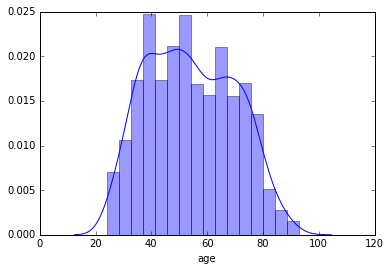

In [8]:
#1.2
#Univariate Analysis
sns.distplot(df['age'])

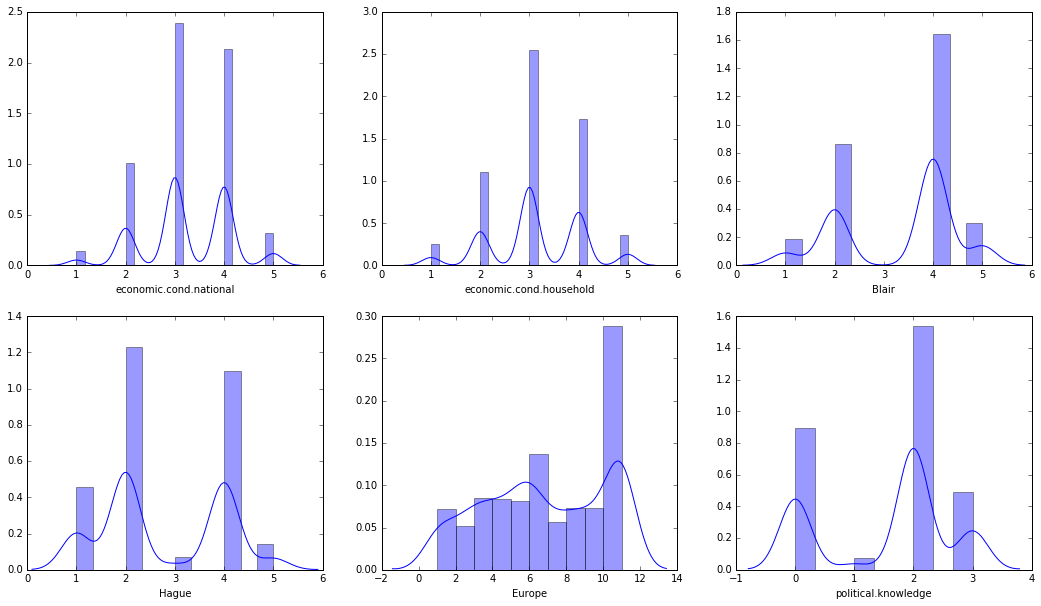

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[0][0])

a = sns.distplot(df['economic.cond.household'] , ax=axes[0][1])

a = sns.distplot(df['Blair'] , ax=axes[0][2])

a = sns.distplot(df['Hague'] , ax=axes[1][0])

a = sns.distplot(df['Europe'] , ax=axes[1][1])

a = sns.distplot(df['political.knowledge'] , ax=axes[1][2])

plt.show()

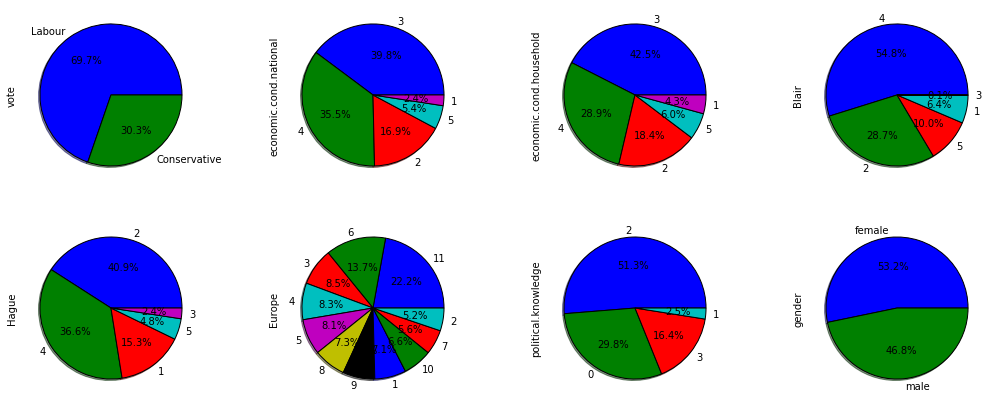

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,7)
a = df['vote'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][0])

a = df['economic.cond.national'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][1])

a = df['economic.cond.household'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][2])

a = df['Blair'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][3])

a = df['Hague'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][0])

a = df['Europe'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][1])

a = df['political.knowledge'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][2])

a = df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][3])

plt.show()

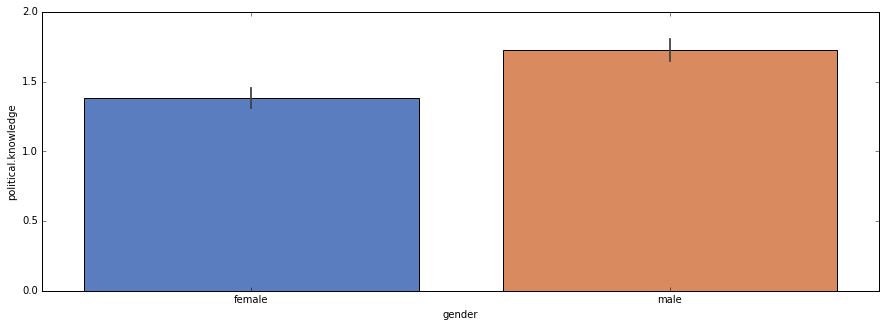

In [11]:
#Bivariate
plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.barplot(x='gender', y='political.knowledge', data=df, palette='muted')  # barplot

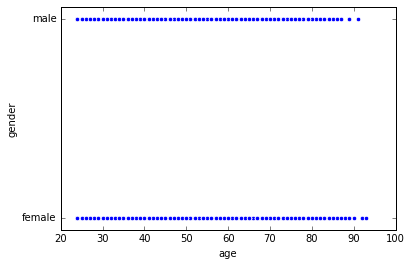

In [12]:
sns.scatterplot(df['age'], df['gender'])

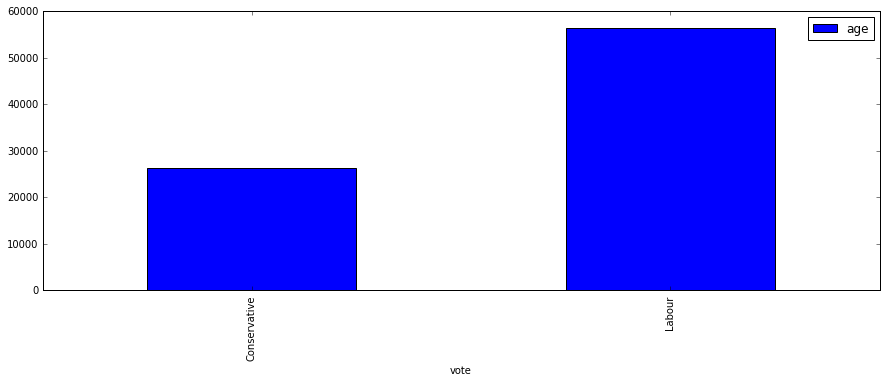

In [13]:
df.groupby(by=['vote'])['age'].sum().reset_index().sort_values(['age']).tail(10).plot(x='vote',y='age',kind='bar',figsize=(15,5))
plt.show()

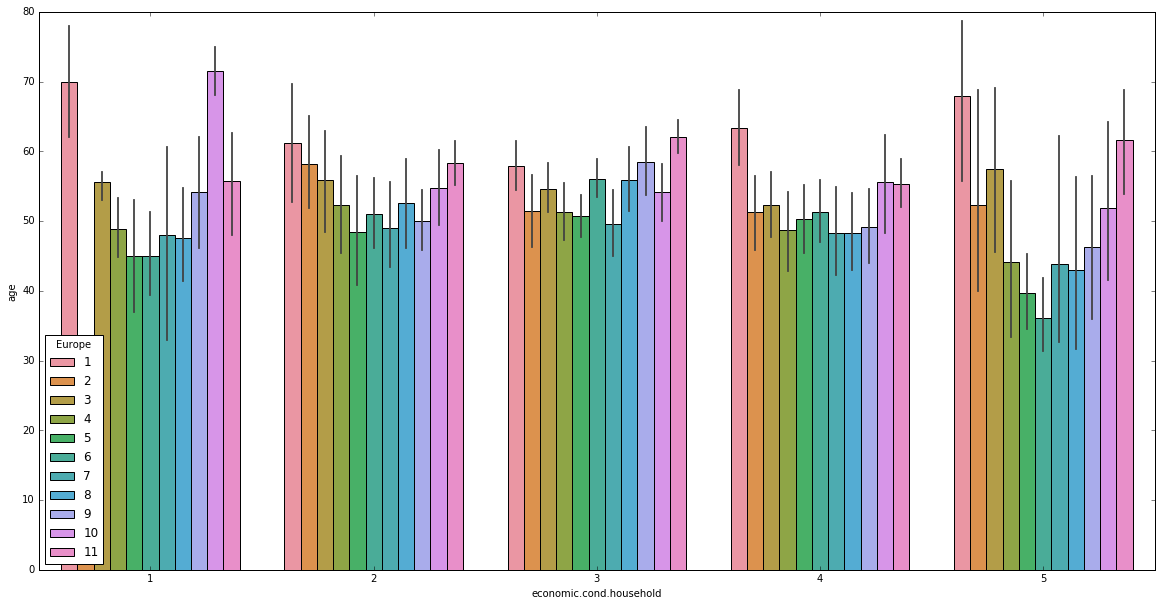

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='economic.cond.household',y='age',hue='Europe')
plt.show()

In [15]:
#EDA
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                        26.0
economic.cond.national      1.0
economic.cond.household     1.0
Blair                       2.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64


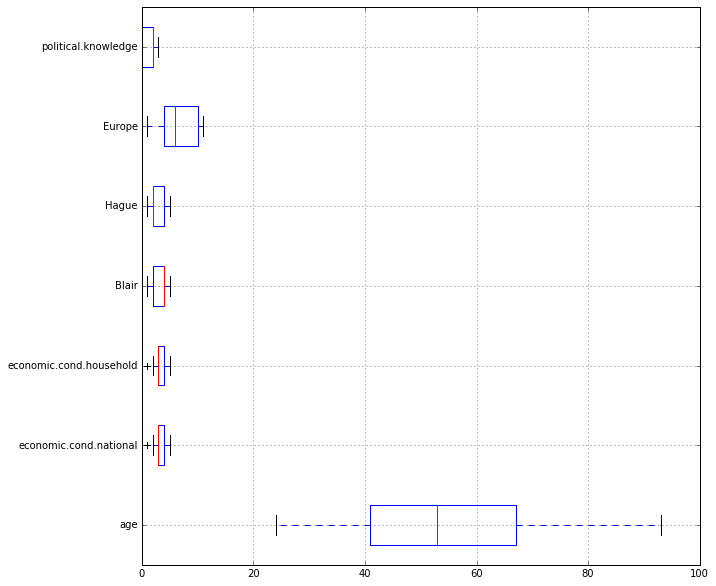

In [17]:
# Outliers_construct box plot
plt.figure(figsize=(10,10))
df.boxplot(vert=0)

In [18]:
#1.3
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

df['vote'] = labelencoder.fit_transform(df.vote) # returns label encoded variable(s)
df['gender'] = labelencoder.fit_transform(df.gender) # returns label encoded variable(s)

In [19]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


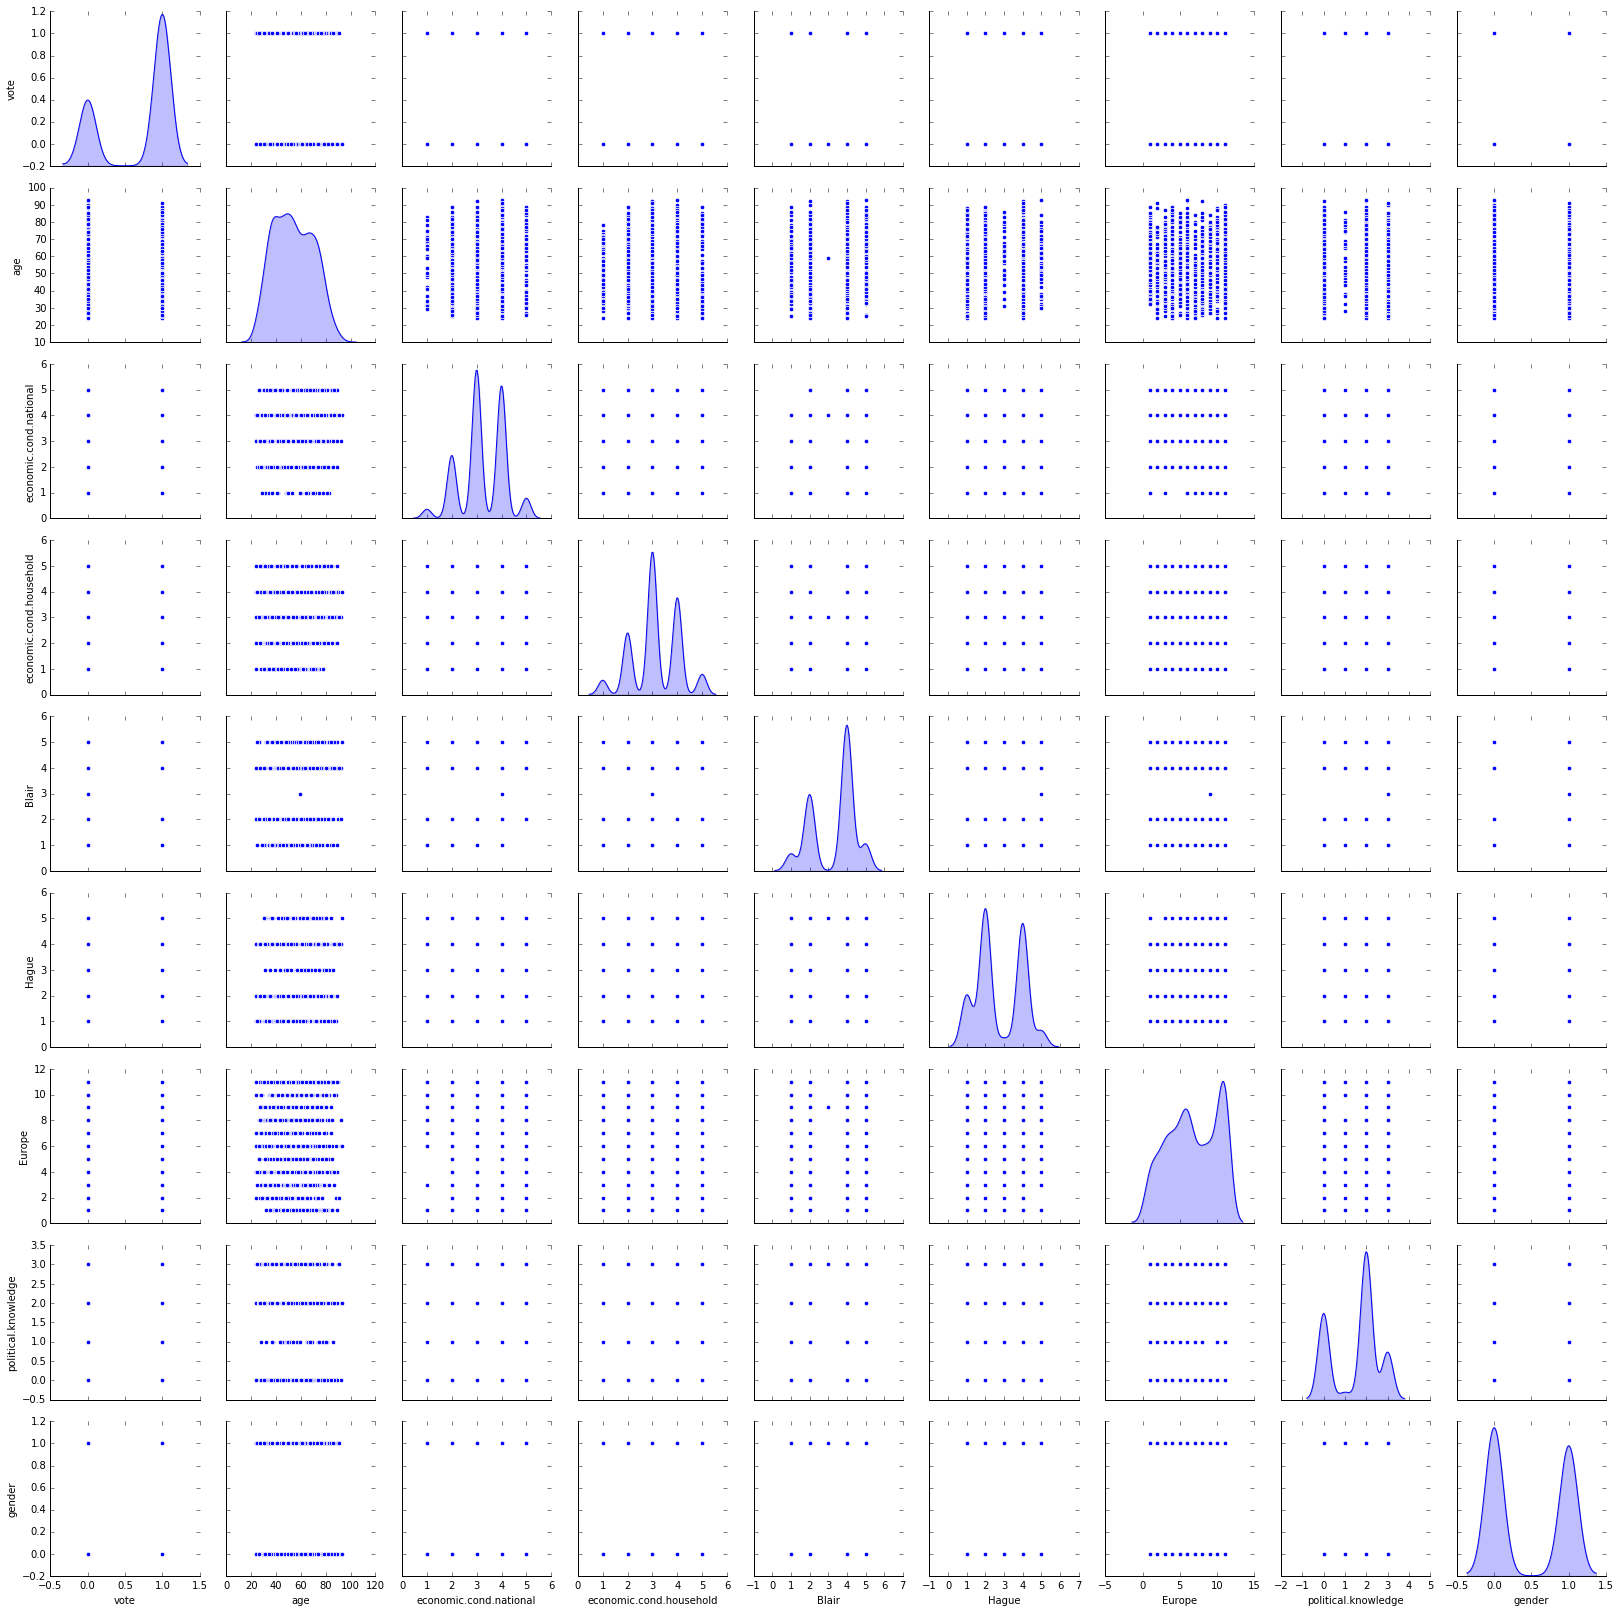

In [20]:
#EDA
sns.pairplot(df, diag_kind='kde')

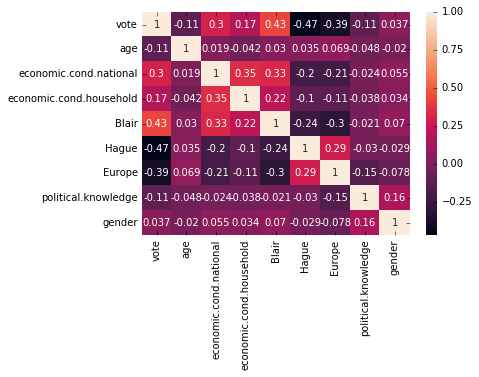

In [21]:
#EDA
sns.heatmap(df.corr(),annot=True)

In [22]:
#EDA
df.cov()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,0.211310,-0.814816,0.121789,0.074693,0.230646,-0.265052,-0.584266,-0.054107,0.008533
age,-0.814816,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301,-0.154840
economic.cond.national,0.121789,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546,0.024063
economic.cond.household,0.074693,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091,0.015713
Blair,0.230646,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621,0.041046
Hague,-0.265052,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469,-0.018064
Europe,-0.584266,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285,-0.127584
political.knowledge,-0.054107,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571,0.085527
gender,0.008533,-0.154840,0.024063,0.015713,0.041046,-0.018064,-0.127584,0.085527,0.249110


In [23]:
X = df.drop('vote', axis=1)
y = df[['vote']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [26]:
#1.4
from sklearn.linear_model import LogisticRegression

In [27]:
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
clf = LinearDiscriminantAnalysis()

In [30]:
model_lda=clf.fit(X_train,y_train)
model_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [31]:
#1.5
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [34]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
from sklearn import svm

In [36]:
SVM_model= svm.SVC(random_state=1, probability=True)
SVM_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
#1.6
#Model Tuning
from imblearn.over_sampling import SMOTE

In [38]:
## SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [39]:
model_log_sm = LogisticRegression(class_weight='balanced')
model_log_sm.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model_lda_sm=clf.fit(X_train_res,y_train_res)
model_lda_sm

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [41]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
SVM_SM_model= svm.SVC(random_state=1, probability=True)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores_log = cross_val_score(model_log, X_train, y_train, cv=10)
scores_log

array([0.81308411, 0.81308411, 0.8411215 , 0.81308411, 0.82242991,
       0.8411215 , 0.81308411, 0.85849057, 0.78301887, 0.79245283])

In [46]:
scores_log = cross_val_score(model_log, X_test, y_test, cv=10)
scores_log

array([0.76086957, 0.80434783, 0.7826087 , 0.80434783, 0.76086957,
       0.7826087 , 0.89130435, 0.80434783, 0.88888889, 0.75555556])

In [47]:
scores_lda = cross_val_score(model_lda, X_train, y_train, cv=10)
scores_lda

array([0.78504673, 0.82242991, 0.85981308, 0.8317757 , 0.8411215 ,
       0.82242991, 0.80373832, 0.9245283 , 0.82075472, 0.80188679])

In [48]:
scores_lda = cross_val_score(model_lda, X_test, y_test, cv=10)
scores_lda

array([0.82608696, 0.84782609, 0.80434783, 0.80434783, 0.82608696,
       0.80434783, 0.84782609, 0.84782609, 0.91111111, 0.75555556])

In [49]:
scores_knn = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores_knn

array([0.77570093, 0.74766355, 0.80373832, 0.79439252, 0.78504673,
       0.75700935, 0.78504673, 0.87735849, 0.80188679, 0.82075472])

In [50]:
scores_knn = cross_val_score(KNN_model, X_test, y_test, cv=10)
scores_knn

array([0.84782609, 0.84782609, 0.82608696, 0.7826087 , 0.82608696,
       0.7826087 , 0.93478261, 0.82608696, 0.88888889, 0.8       ])

In [51]:
scores_nb = cross_val_score(NB_model, X_train, y_train, cv=10)
scores_nb

array([0.81308411, 0.8317757 , 0.82242991, 0.85046729, 0.82242991,
       0.81308411, 0.81308411, 0.88679245, 0.82075472, 0.81132075])

In [52]:
scores_nb = cross_val_score(NB_model, X_test, y_test, cv=10)
scores_nb

array([0.82608696, 0.84782609, 0.82608696, 0.80434783, 0.76086957,
       0.80434783, 0.84782609, 0.91304348, 0.88888889, 0.82222222])

In [53]:
scores_svm = cross_val_score(SVM_model, X_train, y_train, cv=10)
scores_svm

array([0.73831776, 0.73831776, 0.77570093, 0.77570093, 0.76635514,
       0.74766355, 0.71962617, 0.79245283, 0.79245283, 0.79245283])

In [54]:
scores_svm = cross_val_score(SVM_model, X_test, y_test, cv=10)
scores_svm

array([0.7173913 , 0.7173913 , 0.7173913 , 0.7173913 , 0.7173913 ,
       0.7173913 , 0.7173913 , 0.7173913 , 0.71111111, 0.71111111])

In [55]:
#Bagging
from sklearn.ensemble import RandomForestClassifier

In [56]:
#Bagging and Model Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10, 15],
    'max_features': [4, 6, 8],
    'min_samples_leaf': [25, 50, 100],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [201, 301, 501]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [57]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [58]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'n_estimators': 201}

In [59]:
best_grid_rf = grid_search_rf.best_estimator_

In [60]:
best_grid_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=201,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [62]:
#Boosting
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [63]:
#1.7
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [64]:
#logestic
y_log_test_predict = model_log.predict(X_test)
y_log_train_predict = model_log.predict(X_train)

In [65]:
y_log_test_predict

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [66]:
y_log_train_predict

array([0, 1, 1, ..., 1, 1, 0])

In [67]:
# Accuracy - Testing Data
model_log.score(X_test,y_test)

0.7969432314410481

In [68]:
# Accuracy - Training Data
model_log.score(X_train,y_train)

0.8247422680412371

In [69]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_log_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_log_test_predict))

Confusion Matrix 
 [[103  27]
 [ 66 262]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.80       458



In [70]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_log_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_log_train_predict))

Confusion Matrix 
 [[270  62]
 [125 610]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       332
           1       0.91      0.83      0.87       735

    accuracy                           0.82      1067
   macro avg       0.80      0.82      0.80      1067
weighted avg       0.84      0.82      0.83      1067



AUC: 0.885


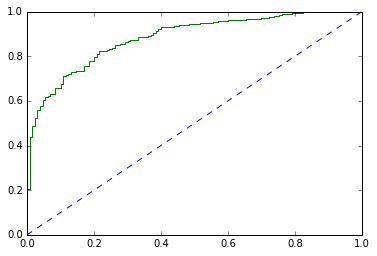

In [71]:
# predict probabilities
probs_log_test = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_log_test = probs_log_test[:, 1]
# calculate AUC
auc_log_test = roc_auc_score(y_test, probs_log_test)
print('AUC: %.3f' % auc_log_test)
# calculate roc curve
test_fpr_log, test_tpr_log, test_thresholds_log = roc_curve(y_test, probs_log_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log, test_tpr_log)

AUC: 0.890


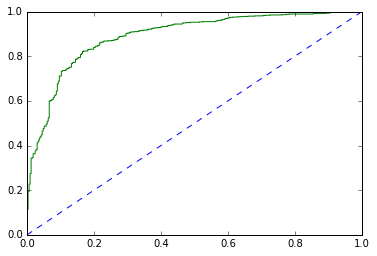

In [72]:
# predict probabilities
probs_log_train = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_log_train = probs_log_train[:, 1]
# calculate AUC
auc_log_train = roc_auc_score(y_train, probs_log_train)
print('AUC: %.3f' % auc_log_train)
# calculate roc curve
train_fpr_log, train_tpr_log, train_thresholds_log = roc_curve(y_train, probs_log_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log, train_tpr_log)

In [73]:
#LDA
y_lda_test_predict = model_lda.predict(X_test)
y_lda_train_predict = model_lda.predict(X_train)

In [74]:
y_lda_test_predict

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [75]:
y_lda_train_predict

array([0, 1, 1, ..., 1, 1, 0])

In [76]:
# Accuracy - Testing Data
model_lda.score(X_test,y_test)

0.8034934497816594

In [77]:
# Accuracy - Training Data
model_lda.score(X_train,y_train)

0.8341143392689785

In [78]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_lda_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_lda_test_predict))

Confusion Matrix 
 [[104  26]
 [ 64 264]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.80      0.70       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.78       458
weighted avg       0.83      0.80      0.81       458



In [79]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_lda_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_lda_train_predict))

Confusion Matrix 
 [[274  58]
 [119 616]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       332
           1       0.91      0.84      0.87       735

    accuracy                           0.83      1067
   macro avg       0.81      0.83      0.82      1067
weighted avg       0.85      0.83      0.84      1067



AUC: 0.884


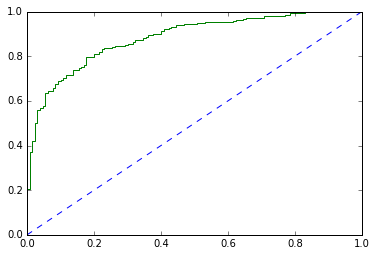

In [80]:
# predict probabilities
probs_lda_test = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
auc_lda_test = roc_auc_score(y_test, probs_lda_test)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda)

AUC: 0.887


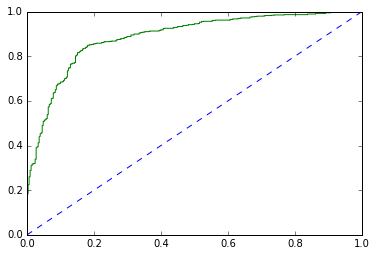

In [81]:
# predict probabilities
probs_lda_train = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda_train = probs_lda_train[:, 1]
# calculate AUC
auc_lda_train = roc_auc_score(y_train, probs_lda_train)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train, probs_lda_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda)

In [82]:
#KNN
y_knn_test_predict = KNN_model.predict(X_test)
y_knn_train_predict = KNN_model.predict(X_train)

In [83]:
y_knn_test_predict

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [84]:
y_knn_train_predict

array([1, 0, 1, ..., 1, 1, 1])

In [85]:
# Accuracy - Testing Data
KNN_model.score(X_test,y_test)

0.7860262008733624

In [86]:
# Accuracy - Training Data
KNN_model.score(X_train,y_train)

0.8537956888472352

In [87]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_knn_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_knn_test_predict))

Confusion Matrix 
 [[ 81  49]
 [ 49 279]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [88]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_knn_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_knn_train_predict))

Confusion Matrix 
 [[242  90]
 [ 66 669]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



AUC: 0.835


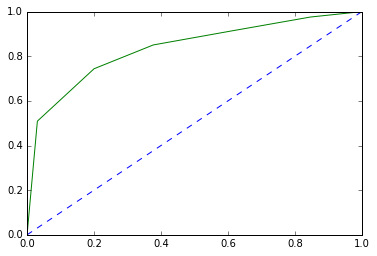

In [89]:
# predict probabilities
probs_knn_test = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(y_test, probs_knn_test)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
test_fpr_knn, test_tpr_knn, test_thresholds_knn = roc_curve(y_test, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_knn, test_tpr_knn)

AUC: 0.921


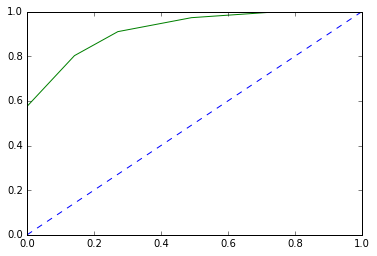

In [90]:
# predict probabilities
probs_knn_train = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(y_train, probs_knn_train)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
train_fpr_knn, train_tpr_knn, train_thresholds_knn = roc_curve(y_train, probs_knn_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_knn, train_tpr_knn)

In [91]:
#Naive Bayes
y_nb_test_predict = NB_model.predict(X_test)
y_nb_train_predict = NB_model.predict(X_train)

In [92]:
y_nb_test_predict

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [93]:
y_nb_train_predict

array([0, 1, 1, ..., 1, 1, 1])

In [94]:
# Accuracy - Testing Data
NB_model.score(X_test,y_test)

0.8253275109170306

In [95]:
# Accuracy - Training Data
NB_model.score(X_train,y_train)

0.8331771321462043

In [96]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_nb_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_nb_test_predict))

Confusion Matrix 
 [[ 94  36]
 [ 44 284]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [97]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_nb_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_nb_train_predict))

Confusion Matrix 
 [[240  92]
 [ 86 649]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC: 0.885


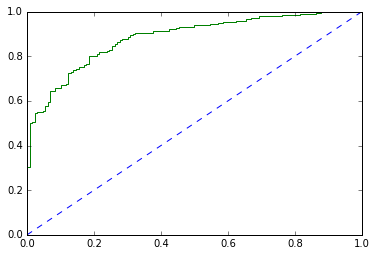

In [98]:
# predict probabilities
probs_nb_test = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nb_test = probs_nb_test[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(y_test, probs_nb_test)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
test_fpr_nb, test_tpr_nb, test_thresholds_nb = roc_curve(y_test, probs_nb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_nb, test_tpr_nb)

AUC: 0.886


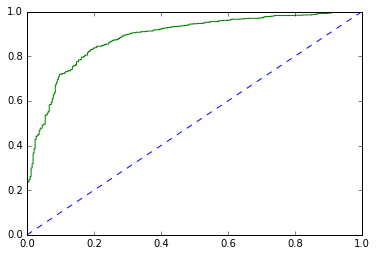

In [99]:
# predict probabilities
probs_nb_train = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_nb_train = probs_nb_train[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(y_train, probs_nb_train)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
train_fpr_nb, train_tpr_nb, train_thresholds_nb = roc_curve(y_train, probs_nb_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_nb, train_tpr_nb)

In [100]:
#SVM
y_svm_test_predict = SVM_model.predict(X_test)
y_svm_train_predict = SVM_model.predict(X_train)
print('Predict- Testing data of SVM','\n',y_svm_test_predict,'\n')
print('Predict- Training data of SVM','\n',y_svm_train_predict,'\n')

Predict- Testing data of SVM 
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1] 

Predict- Training data of SVM 
 [0 1 

In [101]:
#Accuracy
print('Accuracy- Testing data of SVM','\n',SVM_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of SVM','\n',SVM_model.score(X_train,y_train),'\n')

Accuracy- Testing data of SVM 
 0.7860262008733624 

Accuracy- Training data of SVM 
 0.7835051546391752 



In [102]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_svm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_svm_test_predict))

Confusion Matrix 
 [[ 50  80]
 [ 18 310]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.38      0.51       130
           1       0.79      0.95      0.86       328

    accuracy                           0.79       458
   macro avg       0.77      0.66      0.68       458
weighted avg       0.78      0.79      0.76       458



In [103]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_svm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_svm_train_predict))

Confusion Matrix 
 [[135 197]
 [ 34 701]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.41      0.54       332
           1       0.78      0.95      0.86       735

    accuracy                           0.78      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.78      0.76      1067



AUC: 0.857


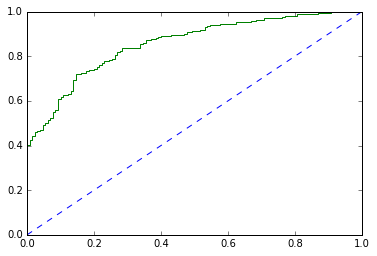

In [104]:
# predict probabilities
probs_svm_test = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_svm_test = probs_svm_test[:, 1]
# calculate AUC
auc_svm_test = roc_auc_score(y_test, probs_svm_test)
print('AUC: %.3f' % auc_svm_test)
# calculate roc curve
test_fpr_svm, test_tpr_svm, test_thresholds_svm = roc_curve(y_test, probs_svm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_svm, test_tpr_svm)

AUC: 0.870


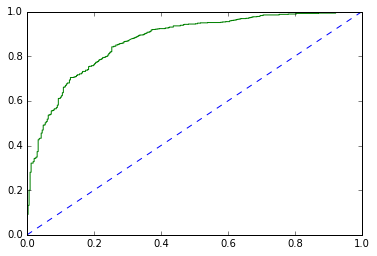

In [105]:
# predict probabilities
probs_svm_train = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_svm_train = probs_svm_train[:, 1]
# calculate AUC
auc_svm_train = roc_auc_score(y_train, probs_svm_train)
print('AUC: %.3f' % auc_svm_train)
# calculate roc curve
train_fpr_svm, train_tpr_svm, train_thresholds_svm = roc_curve(y_train, probs_svm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_svm, train_tpr_svm)

In [106]:
#Logistic with SMOTE
y_log_sm_test_predict = model_log_sm.predict(X_test)
y_log_sm_train_predict = model_log_sm.predict(X_train)
print('Predict- Testing data of Logistic with SMOTE','\n',y_log_sm_test_predict,'\n')
print('Predict- Training data of Logistic with SMOTE','\n',y_log_sm_train_predict,'\n')

Predict- Testing data of Logistic with SMOTE 
 [0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 1] 

Predict- Training dat

In [107]:
#Accuracy
print('Accuracy- Testing data of Logistic with SMOTE','\n',model_log_sm.score(X_test,y_test),'\n')
print('Accuracy- Training data of Logistic with SMOTE','\n',model_log_sm.score(X_train,y_train),'\n')

Accuracy- Testing data of Logistic with SMOTE 
 0.7947598253275109 

Accuracy- Training data of Logistic with SMOTE 
 0.831302717900656 



In [108]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_log_sm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_log_sm_test_predict))

Confusion Matrix 
 [[102  28]
 [ 66 262]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.78      0.68       130
           1       0.90      0.80      0.85       328

    accuracy                           0.79       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.79      0.80       458



In [109]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_log_sm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_log_sm_train_predict))

Confusion Matrix 
 [[272  60]
 [120 615]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       332
           1       0.91      0.84      0.87       735

    accuracy                           0.83      1067
   macro avg       0.80      0.83      0.81      1067
weighted avg       0.84      0.83      0.83      1067



AUC: 0.881


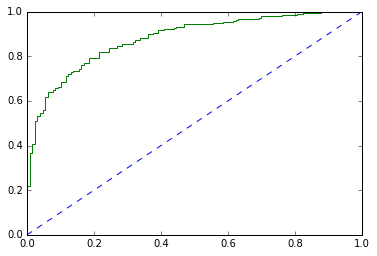

In [110]:
# predict probabilities
probs_log_sm_test = model_log_sm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_log_sm_test = probs_log_sm_test[:, 1]
# calculate AUC
auc_log_sm_test = roc_auc_score(y_test, probs_log_sm_test)
print('AUC: %.3f' % auc_log_sm_test)
# calculate roc curve
test_fpr_log_sm, test_tpr_log_sm, test_thresholds_log_sm = roc_curve(y_test, probs_log_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log_sm, test_tpr_log_sm)

AUC: 0.886


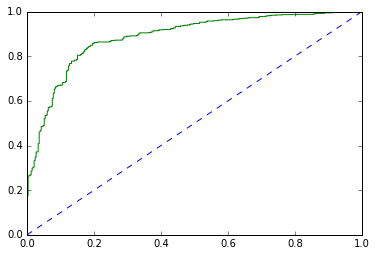

In [111]:
# predict probabilities
probs_log_sm_train = model_log_sm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_log_sm_train = probs_log_sm_train[:, 1]
# calculate AUC
auc_log_sm_train = roc_auc_score(y_train, probs_log_sm_train)
print('AUC: %.3f' % auc_log_sm_train)
# calculate roc curve
train_fpr_log_sm, train_tpr_log_sm, train_thresholds_log_sm = roc_curve(y_train, probs_log_sm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log_sm, train_tpr_log_sm)

In [112]:
#LDA with SMOTE
y_lda_sm_test_predict = model_lda_sm.predict(X_test)
y_lda_sm_train_predict = model_lda_sm.predict(X_train)
print('Predict- Testing data of LDA with SMOTE','\n',y_lda_sm_test_predict,'\n')
print('Predict- Training data of LDA with SMOTE','\n',y_lda_sm_train_predict,'\n')

Predict- Testing data of LDA with SMOTE 
 [0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 1] 

Predict- Training data of 

In [113]:
#Accuracy
print('Accuracy- Testing data of LDA with SMOTE','\n',model_lda_sm.score(X_test,y_test),'\n')
print('Accuracy- Training data of LDA with SMOTE','\n',model_lda_sm.score(X_train,y_train),'\n')

Accuracy- Testing data of LDA with SMOTE 
 0.8034934497816594 

Accuracy- Training data of LDA with SMOTE 
 0.8341143392689785 



In [114]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_lda_sm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_lda_sm_test_predict))

Confusion Matrix 
 [[104  26]
 [ 64 264]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.80      0.70       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.78       458
weighted avg       0.83      0.80      0.81       458



In [115]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_lda_sm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_lda_sm_train_predict))

Confusion Matrix 
 [[274  58]
 [119 616]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       332
           1       0.91      0.84      0.87       735

    accuracy                           0.83      1067
   macro avg       0.81      0.83      0.82      1067
weighted avg       0.85      0.83      0.84      1067



AUC: 0.884


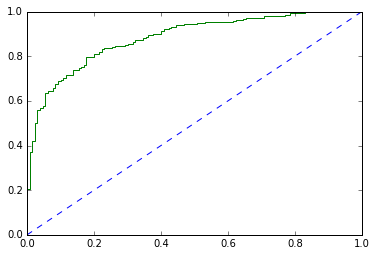

In [116]:
# predict probabilities
probs_lda_sm_test = model_lda_sm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda_sm_test = probs_lda_sm_test[:, 1]
# calculate AUC
auc_lda_sm_test = roc_auc_score(y_test, probs_lda_sm_test)
print('AUC: %.3f' % auc_lda_sm_test)
# calculate roc curve
test_fpr_lda_sm, test_tpr_lda_sm, test_thresholds_lda_sm = roc_curve(y_test, probs_lda_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda_sm, test_tpr_lda_sm)

AUC: 0.887


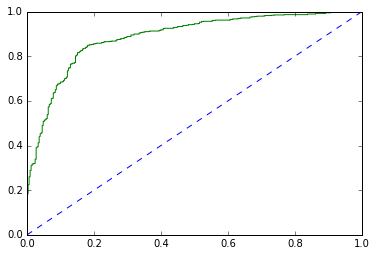

In [117]:
# predict probabilities
probs_lda_sm_train = model_lda_sm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda_sm_train = probs_lda_sm_train[:, 1]
# calculate AUC
auc_lda_sm_train = roc_auc_score(y_train, probs_lda_sm_train)
print('AUC: %.3f' % auc_lda_sm_train)
# calculate roc curve
train_fpr_lda_sm, train_tpr_lda_sm, train_thresholds_lda_sm = roc_curve(y_train, probs_lda_sm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda_sm, train_tpr_lda_sm)

In [118]:
#KNN with SMOTE
y_knn_sm_test_predict = KNN_SM_model.predict(X_test)
y_knn_sm_train_predict = KNN_SM_model.predict(X_train)
print('Predict- Testing data of KNN with SMOTE','\n',y_knn_sm_test_predict,'\n')
print('Predict- Training data of KNN with SMOTE','\n',y_knn_sm_train_predict,'\n')

Predict- Testing data of KNN with SMOTE 
 [0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 0] 

Predict- Training data of 

In [119]:
#Accuracy
print('Accuracy- Testing data of KNN with SMOTE','\n',KNN_SM_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of KNN with SMOTE','\n',KNN_SM_model.score(X_train,y_train),'\n')

Accuracy- Testing data of KNN with SMOTE 
 0.7532751091703057 

Accuracy- Training data of KNN with SMOTE 
 0.8547328959700093 



In [120]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_knn_sm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_knn_sm_test_predict))

Confusion Matrix 
 [[100  30]
 [ 83 245]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.55      0.77      0.64       130
           1       0.89      0.75      0.81       328

    accuracy                           0.75       458
   macro avg       0.72      0.76      0.73       458
weighted avg       0.79      0.75      0.76       458



In [121]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_knn_sm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_knn_sm_train_predict))

Confusion Matrix 
 [[299  33]
 [122 613]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       332
           1       0.95      0.83      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.87      0.84      1067
weighted avg       0.87      0.85      0.86      1067



AUC: 0.842


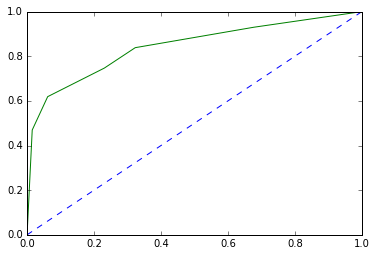

In [122]:
# predict probabilities
probs_knn_sm_test = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn_sm_test = probs_knn_sm_test[:, 1]
# calculate AUC
auc_knn_sm_test = roc_auc_score(y_test, probs_knn_sm_test)
print('AUC: %.3f' % auc_knn_sm_test)
# calculate roc curve
test_fpr_knn_sm, test_tpr_knn_sm, test_thresholds_knn_sm = roc_curve(y_test, probs_knn_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_knn_sm, test_tpr_knn_sm)

AUC: 0.950


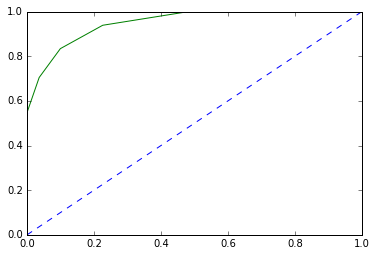

In [123]:
# predict probabilities
probs_knn_sm_train = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_knn_sm_train = probs_knn_sm_train[:, 1]
# calculate AUC
auc_knn_sm_train = roc_auc_score(y_train, probs_knn_sm_train)
print('AUC: %.3f' % auc_knn_sm_train)
# calculate roc curve
train_fpr_knn_sm, train_tpr_knn_sm, train_thresholds_knn_sm = roc_curve(y_train, probs_knn_sm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_knn_sm, train_tpr_knn_sm)

In [124]:
#NB with SMOTE
y_nb_sm_test_predict = NB_SM_model.predict(X_test)
y_nb_sm_train_predict = NB_SM_model.predict(X_train)
print('Predict- Testing data of NB with SMOTE','\n',y_nb_sm_test_predict,'\n')
print('Predict- Training data of NB with SMOTE','\n',y_nb_sm_train_predict,'\n')

Predict- Testing data of NB with SMOTE 
 [0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 0] 

Predict- Training data of N

In [125]:
#Accuracy
print('Accuracy- Testing data of NB with SMOTE','\n',NB_SM_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of NB with SMOTE','\n',NB_SM_model.score(X_train,y_train),'\n')

Accuracy- Testing data of NB with SMOTE 
 0.7969432314410481 

Accuracy- Training data of NB with SMOTE 
 0.8181818181818182 



In [126]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_nb_sm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_nb_sm_test_predict))

Confusion Matrix 
 [[103  27]
 [ 66 262]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.80       458



In [127]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_nb_sm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_nb_sm_train_predict))

Confusion Matrix 
 [[256  76]
 [118 617]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.77      0.73       332
           1       0.89      0.84      0.86       735

    accuracy                           0.82      1067
   macro avg       0.79      0.81      0.79      1067
weighted avg       0.83      0.82      0.82      1067



AUC: 0.875


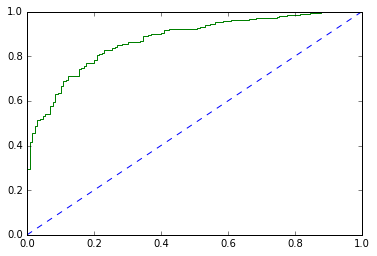

In [128]:
# predict probabilities
probs_nb_sm_test = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nb_sm_test = probs_nb_sm_test[:, 1]
# calculate AUC
auc_nb_sm_test = roc_auc_score(y_test, probs_nb_sm_test)
print('AUC: %.3f' % auc_nb_sm_test)
# calculate roc curve
test_fpr_nb_sm, test_tpr_nb_sm, test_thresholds_nb_sm = roc_curve(y_test, probs_nb_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_nb_sm, test_tpr_nb_sm)

AUC: 0.881


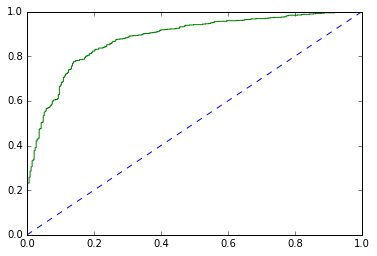

In [129]:
# predict probabilities
probs_nb_sm_train = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_nb_sm_train = probs_nb_sm_train[:, 1]
# calculate AUC
auc_nb_sm_train = roc_auc_score(y_train, probs_nb_sm_train)
print('AUC: %.3f' % auc_nb_sm_train)
# calculate roc curve
train_fpr_nb_sm, train_tpr_nb_sm, train_thresholds_nb_sm = roc_curve(y_train, probs_nb_sm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_nb_sm, train_tpr_nb_sm)

In [130]:
#SVM with SMOTE
y_svm_sm_test_predict = SVM_SM_model.predict(X_test)
y_svm_sm_train_predict = SVM_SM_model.predict(X_train)
print('Predict- Testing data of SVM with SMOTE','\n',y_svm_sm_test_predict,'\n')
print('Predict- Training data of SVM with SMOTE','\n',y_svm_sm_train_predict,'\n')

Predict- Testing data of SVM with SMOTE 
 [0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 0] 

Predict- Training data of 

In [131]:
#Accuracy
print('Accuracy- Testing data of SVM with SMOTE','\n',SVM_SM_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of SVM with SMOTE','\n',SVM_SM_model.score(X_train,y_train),'\n')

Accuracy- Testing data of SVM with SMOTE 
 0.7816593886462883 

Accuracy- Training data of SVM with SMOTE 
 0.7975632614807873 



In [132]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_svm_sm_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_svm_sm_test_predict))

Confusion Matrix 
 [[106  24]
 [ 76 252]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.58      0.82      0.68       130
           1       0.91      0.77      0.83       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.78      0.79       458



In [133]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_svm_sm_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_svm_sm_train_predict))

Confusion Matrix 
 [[264  68]
 [148 587]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.80      0.71       332
           1       0.90      0.80      0.84       735

    accuracy                           0.80      1067
   macro avg       0.77      0.80      0.78      1067
weighted avg       0.82      0.80      0.80      1067



AUC: 0.866


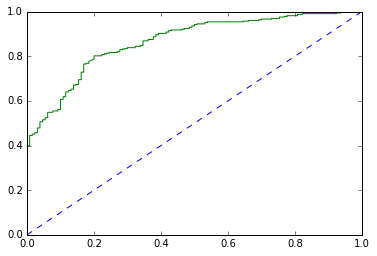

In [134]:
# predict probabilities
probs_svm_sm_test = SVM_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_svm_sm_test = probs_svm_sm_test[:, 1]
# calculate AUC
auc_svm_sm_test = roc_auc_score(y_test, probs_svm_sm_test)
print('AUC: %.3f' % auc_svm_sm_test)
# calculate roc curve
test_fpr_svm_sm, test_tpr_svm_sm, test_thresholds_svm_sm = roc_curve(y_test, probs_svm_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_svm_sm, test_tpr_svm_sm)

AUC: 0.873


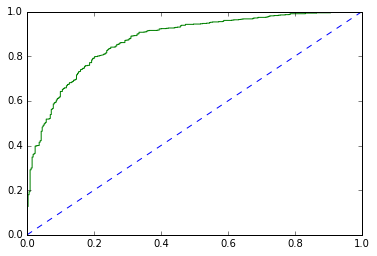

In [135]:
# predict probabilities
probs_svm_sm_train = SVM_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_svm_sm_train = probs_svm_sm_train[:, 1]
# calculate AUC
auc_svm_sm_train = roc_auc_score(y_train, probs_svm_sm_train)
print('AUC: %.3f' % auc_svm_sm_train)
# calculate roc curve
train_fpr_svm_sm, train_tpr_svm_sm, train_thresholds_svm_sm = roc_curve(y_train, probs_svm_sm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_svm_sm, train_tpr_svm_sm)

In [136]:
#Grid search Random Forest Classifier
y_best_grid_rf_test_predict = best_grid_rf.predict(X_test)
y_best_grid_rf_train_predict = best_grid_rf.predict(X_train)
print('Predict- Testing data of Random Forest Classifier','\n',y_best_grid_rf_test_predict,'\n')
print('Predict- Training data of Random Forest Classifier','\n',y_best_grid_rf_train_predict,'\n')

Predict- Testing data of Random Forest Classifier 
 [0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 1] 

Predict- Trainin

In [137]:
#Accuracy
print('Accuracy- Testing data of Random Forest Classifier','\n',best_grid_rf.score(X_test,y_test),'\n')
print('Accuracy- Training data of Random Forest Classifier','\n',best_grid_rf.score(X_train,y_train),'\n')

Accuracy- Testing data of Random Forest Classifier 
 0.8165938864628821 

Accuracy- Training data of Random Forest Classifier 
 0.8472352389878163 



In [138]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_best_grid_rf_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_best_grid_rf_test_predict))

Confusion Matrix 
 [[ 88  42]
 [ 42 286]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [139]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_best_grid_rf_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_best_grid_rf_train_predict))

Confusion Matrix 
 [[239  93]
 [ 70 665]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       332
           1       0.88      0.90      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.890


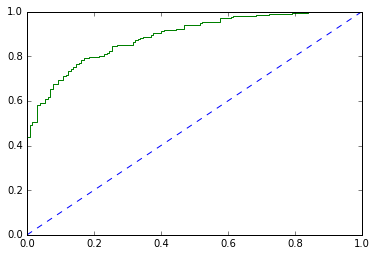

In [140]:
# predict probabilities
probs_best_grid_rf_test = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_best_grid_rf_test = probs_best_grid_rf_test[:, 1]
# calculate AUC
auc_best_grid_rf_test = roc_auc_score(y_test, probs_best_grid_rf_test)
print('AUC: %.3f' % auc_best_grid_rf_test)
# calculate roc curve
test_fpr_best_grid_rf, test_tpr_best_grid_rf, test_thresholds_best_grid_rf = roc_curve(y_test, probs_best_grid_rf_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_best_grid_rf, test_tpr_best_grid_rf)

AUC: 0.908


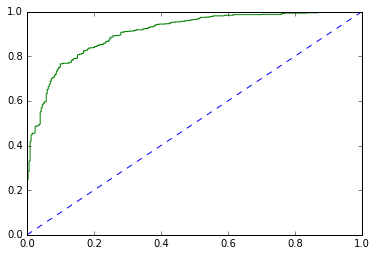

In [141]:
# predict probabilities
probs_best_grid_rf_train = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_best_grid_rf_train = probs_best_grid_rf_train[:, 1]
# calculate AUC
auc_best_grid_rf_train = roc_auc_score(y_train, probs_best_grid_rf_train)
print('AUC: %.3f' % auc_best_grid_rf_train)
# calculate roc curve
train_fpr_best_grid_rf, train_tpr_best_grid_rf, train_thresholds_best_grid_rf = roc_curve(y_train, probs_best_grid_rf_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_best_grid_rf, train_tpr_best_grid_rf)

In [142]:
#ADA_Boost_model
y_ADB_model_test_predict = ADB_model.predict(X_test)
y_ADB_model_train_predict = ADB_model.predict(X_train)
print('Predict- Testing data of ADB_model','\n',y_ADB_model_test_predict,'\n')
print('Predict- Training data of ADB_model','\n',y_ADB_model_train_predict,'\n')

Predict- Testing data of ADB_model 
 [0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1] 

Predict- Training data of ADB_m

In [143]:
#Accuracy
print('Accuracy- Testing data of ADB_model','\n',ADB_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of ADB_model','\n',ADB_model.score(X_train,y_train),'\n')

Accuracy- Testing data of ADB_model 
 0.8187772925764192 

Accuracy- Training data of ADB_model 
 0.8472352389878163 



In [144]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_ADB_model_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_ADB_model_test_predict))

Confusion Matrix 
 [[ 90  40]
 [ 43 285]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [145]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_ADB_model_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_ADB_model_train_predict))

Confusion Matrix 
 [[238  94]
 [ 69 666]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.879


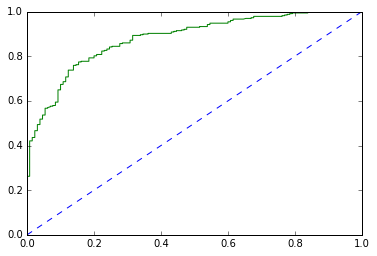

In [146]:
# predict probabilities
probs_ADB_model_test = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ADB_model_test = probs_ADB_model_test[:, 1]
# calculate AUC
auc_ADB_model_test = roc_auc_score(y_test, probs_ADB_model_test)
print('AUC: %.3f' % auc_ADB_model_test)
# calculate roc curve
test_fpr_ADB_model, test_tpr_ADB_model, test_thresholds_ADB_model = roc_curve(y_test, probs_ADB_model_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ADB_model, test_tpr_ADB_model)

AUC: 0.913


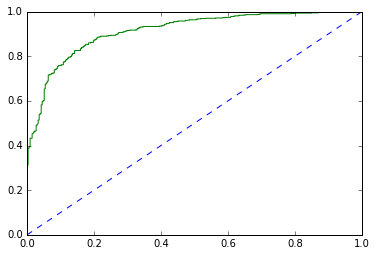

In [147]:
# predict probabilities
probs_ADB_model_train = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_ADB_model_train = probs_ADB_model_train[:, 1]
# calculate AUC
auc_ADB_model_train = roc_auc_score(y_train, probs_ADB_model_train)
print('AUC: %.3f' % auc_ADB_model_train)
# calculate roc curve
train_fpr_ADB_model, train_tpr_ADB_model, train_thresholds_ADB_model = roc_curve(y_train, probs_ADB_model_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ADB_model, train_tpr_ADB_model)

In [148]:
#XGB_model
y_XGB_model_test_predict = XGB_model.predict(X_test)
y_XGB_model_train_predict = XGB_model.predict(X_train)
print('Predict- Testing data of XGB_model','\n',y_XGB_model_test_predict,'\n')
print('Predict- Training data of XGB_model','\n',y_XGB_model_train_predict,'\n')

Predict- Testing data of XGB_model 
 [0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 0] 

Predict- Training data of XGB_m

In [149]:
#Accuracy
print('Accuracy- Testing data of XGB_model','\n',XGB_model.score(X_test,y_test),'\n')
print('Accuracy- Training data of XGB_model','\n',XGB_model.score(X_train,y_train),'\n')

Accuracy- Testing data of XGB_model 
 0.8122270742358079 

Accuracy- Training data of XGB_model 
 0.8865979381443299 



In [150]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_XGB_model_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_XGB_model_test_predict))

Confusion Matrix 
 [[ 93  37]
 [ 49 279]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68       130
           1       0.88      0.85      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.81       458



In [151]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_XGB_model_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_XGB_model_train_predict))

Confusion Matrix 
 [[262  70]
 [ 51 684]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.878


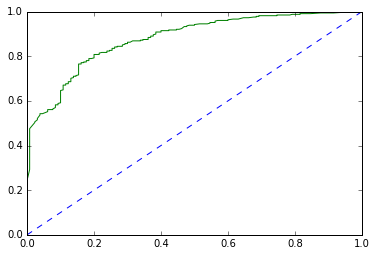

In [152]:
# predict probabilities
probs_XGB_model_test = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_XGB_model_test = probs_XGB_model_test[:, 1]
# calculate AUC
auc_XGB_model_test = roc_auc_score(y_test, probs_XGB_model_test)
print('AUC: %.3f' % auc_XGB_model_test)
# calculate roc curve
test_fpr_XGB_model, test_tpr_XGB_model, test_thresholds_XGB_model = roc_curve(y_test, probs_XGB_model_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_XGB_model, test_tpr_XGB_model)

AUC: 0.941


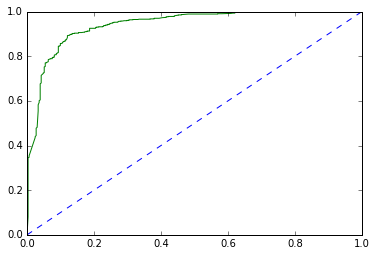

In [153]:
# predict probabilities
probs_XGB_model_train = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_XGB_model_train = probs_XGB_model_train[:, 1]
# calculate AUC
auc_XGB_model_train = roc_auc_score(y_train, probs_XGB_model_train)
print('AUC: %.3f' % auc_XGB_model_train)
# calculate roc curve
train_fpr_XGB_model, train_tpr_XGB_model, train_thresholds_XGB_model = roc_curve(y_train, probs_XGB_model_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_XGB_model, train_tpr_XGB_model)

In [154]:
#2
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\User\Anaconda3\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [155]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [156]:
#2.1
number_of_characters_Roosevelt = len(Roosevelt)
print('Number of characters with space in Roosevelt text file :', number_of_characters_Roosevelt)

Number of characters with space in Roosevelt text file : 7571


In [157]:
Roosevelt_1 = Roosevelt.replace(" ","")
number_of_characters_Roosevelt_1 = len(Roosevelt_1)
print('Number of characters without space in Roosevelt text file :', number_of_characters_Roosevelt_1)

Number of characters without space in Roosevelt text file : 6249


In [158]:
words_Roosevelt = Roosevelt.split()
print('Number of words in Roosevelt text file :', len(words_Roosevelt))

Number of words in Roosevelt text file : 1360


In [159]:
number_of_sentences_Roosevelt = sent_tokenize(Roosevelt)
print(len(number_of_sentences_Roosevelt))

68


In [160]:
number_of_characters_Kennedy = len(Kennedy)
print('Number of characters with space in Kennedy text file :', number_of_characters_Kennedy)

Number of characters with space in Kennedy text file : 7618


In [161]:
Kennedy_1 = Kennedy.replace(" ","")
number_of_characters_Kennedy_1 = len(Kennedy_1)
print('Number of characters without space in Kennedy text file :', number_of_characters_Kennedy_1)

Number of characters without space in Kennedy text file : 6255


In [162]:
words_Kennedy = Kennedy.split()
print('Number of words in Kennedy text file :', len(words_Kennedy))

Number of words in Kennedy text file : 1390


In [163]:
number_of_sentences_Kennedy = sent_tokenize(Kennedy)
print(len(number_of_sentences_Kennedy))

52


In [164]:
number_of_characters_Nixon = len(Nixon)
print('Number of characters with space in Nixon text file :', number_of_characters_Nixon)

Number of characters with space in Nixon text file : 9991


In [165]:
Nixon_1 = Nixon.replace(" ","")
number_of_characters_Nixon_1 = len(Nixon_1)
print('Number of characters without space in Nixon text file :', number_of_characters_Nixon_1)

Number of characters without space in Nixon text file : 8223


In [166]:
words_Nixon = Nixon.split()
print('Number of words in Nixon text file :', len(words_Nixon))

Number of words in Nixon text file : 1819


In [167]:
number_of_sentences_Nixon = sent_tokenize(Nixon)
print(len(number_of_sentences_Nixon))

68


In [168]:
#2.2
stop = stopwords.words('english')

In [169]:
word_tokens_Roosevelt = word_tokenize(Roosevelt)
filtered_sentence_Roosevelt = [] 
for w in word_tokens_Roosevelt: 
    if w not in stop: 
        filtered_sentence_Roosevelt.append(w)  
print(filtered_sentence_Roosevelt) 

['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'come', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'man', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'men', 'doubt', '.', 'There', 'men', 'believe', 'democracy', ',', 'form', 'Government', 'fra

In [170]:
word_tokens_Kennedy = word_tokenize(Kennedy) 
filtered_sentence_Kennedy = [] 
for w in word_tokens_Kennedy: 
    if w not in stop: 
        filtered_sentence_Kennedy.append(w)   
print(filtered_sentence_Kennedy)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'observe', 'today', 'victory', 'party', ',', 'celebration', 'freedom', '--', 'symbolizing', 'end', ',', 'well', 'beginning', '--', 'signifying', 'renewal', ',', 'well', 'change', '.', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', '.', 'The', 'world', 'different', '.', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', '.', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', '--', 'belief', 'rights', 'man', 'come', 'generosity', 'state', ',', 'hand', 'God', '.', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', '.', 'Let', '

In [171]:
word_tokens_Nixon = word_tokenize(Nixon)
filtered_sentence_Nixon = [] 
for w in word_tokens_Nixon: 
    if w not in stop: 
        filtered_sentence_Nixon.append(w)   
print(filtered_sentence_Nixon)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', ':', 'When', 'met', 'four', 'years', 'ago', ',', 'America', 'bleak', 'spirit', ',', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', '.', 'As', 'meet', 'today', ',', 'stand', 'threshold', 'new', 'era', 'peace', 'world', '.', 'The', 'central', 'question', 'us', ':', 'How', 'shall', 'use', 'peace', '?', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', ':', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', '.', 'Let', 'us', 'resolve', 'become', ':', 'time', 'great', 'responsibilities', 'greatly', 'borne', ',', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation', '.', 'This', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', '

In [172]:
#2.3
fdist_Roosevelt = FreqDist(filtered_sentence_Roosevelt)
fdist_Roosevelt.most_common(10)

[(',', 77),
 ('.', 68),
 ('--', 25),
 ('It', 13),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('spirit', 9),
 ('life', 9),
 ('us', 8)]

In [173]:
fdist_Kennedy = FreqDist(filtered_sentence_Kennedy)
fdist_Kennedy.most_common(10)

[(',', 84),
 ('.', 50),
 ('--', 25),
 ('us', 12),
 ('world', 8),
 ('Let', 8),
 ('let', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7)]

In [174]:
fdist_Nixon = FreqDist(filtered_sentence_Nixon)
fdist_Nixon.most_common(10)

[(',', 96),
 ('.', 65),
 ('us', 26),
 ('America', 21),
 ('peace', 19),
 ('world', 17),
 ('--', 17),
 ('new', 15),
 ("'s", 14),
 ('Let', 13)]

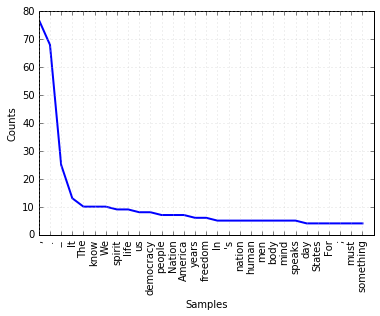

In [175]:
2.4
fdist_Roosevelt.plot(30,cumulative=False)
plt.show()

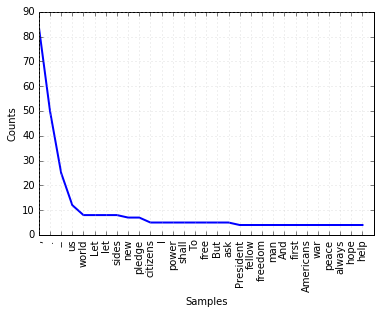

In [176]:
fdist_Kennedy.plot(30,cumulative=False)
plt.show()

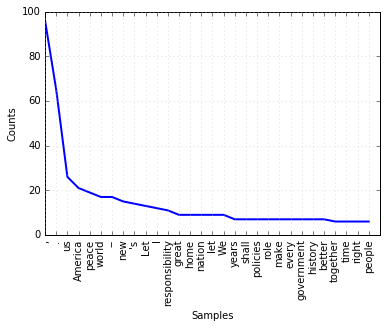

In [177]:
fdist_Nixon.plot(30,cumulative=False)
plt.show()